## ECON 522 Lab - Week 4

Today we will talk about Chapter 5.2.4 of FX Diebold's Book as well as some Monte Carlo simulations should time permit.

### Midterm Warmup

Consider an $MA(1)$ model, $y_t = 0.5\varepsilon_{t-1} + \varepsilon_t$ where $\varepsilon_t \sim WN$. Calculate (1) $\mathbb{E}(y_t)$, (2) $var(y_t), (3) autocovariance at lag 1 and 2, and (4) autocorrelation coefficient at lag 0, 1, and 2 

### Section 5.2.4. of Diebold's Book

Let us load up some data from FRED

            Retail Sales
1992-01-01      146925.0
1992-02-01      147223.0
1992-03-01      146805.0
1992-04-01      148032.0
1992-05-01      149010.0
...                  ...
2024-08-01      614535.0
2024-09-01      620104.0
2024-10-01      623269.0
2024-11-01      628727.0
2024-12-01      632249.0

[396 rows x 1 columns]


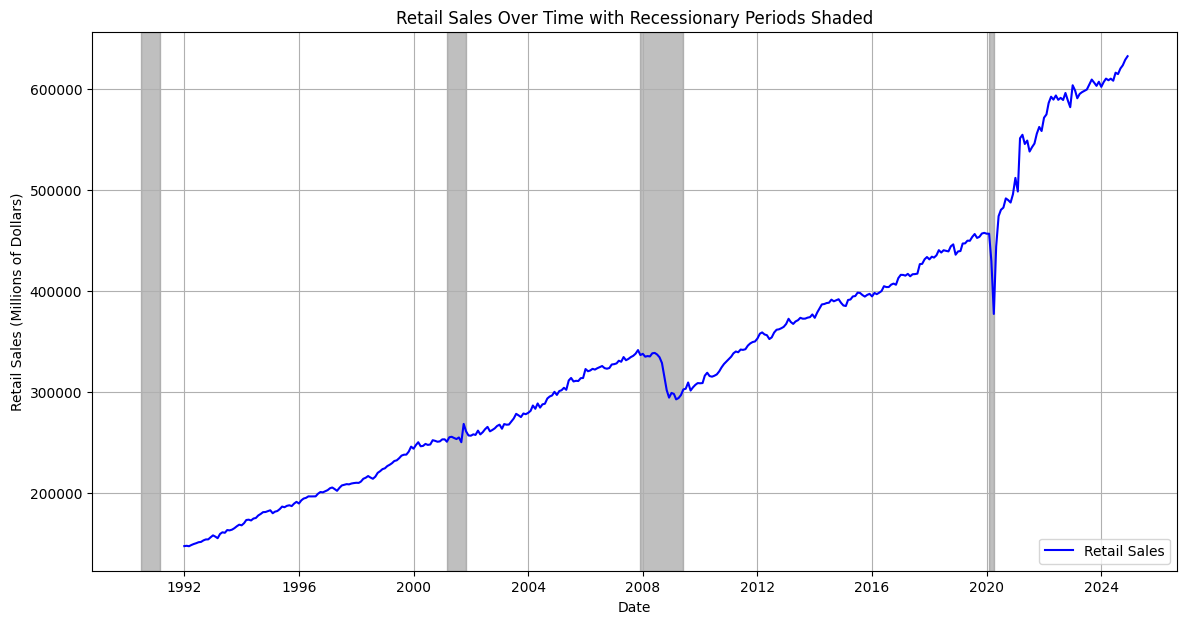

In [8]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='fe3741e38a5245c3cc826f2d6ae3e1f2')

# Download the Retail Sales series (RSXFS) from FRED
# Use monthly data from as far back as possible to the current date
retail_sales = fred.get_series('RSXFS', observation_start='1990-07-01')

# Convert the series to a DataFrame
retail_sales_df = retail_sales.to_frame(name='Retail Sales')
retail_sales_df.index = pd.to_datetime(retail_sales_df.index)
print(retail_sales_df)


# Plot Retail Sales over time
plt.figure(figsize=(14, 7))
plt.plot(retail_sales_df.index, retail_sales_df['Retail Sales'], label='Retail Sales', color='blue')

# Shade recessionary periods
recession_periods = [
    ('1990-07-01', '1991-03-01'),
    ('2001-03-01', '2001-11-01'),
    ('2007-12-01', '2009-06-01'),
    ('2020-02-01', '2020-04-01')
]

for start, end in recession_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.5)

plt.title('Retail Sales Over Time with Recessionary Periods Shaded')
plt.xlabel('Date')
plt.ylabel('Retail Sales (Millions of Dollars)')
plt.legend()
plt.grid(True)
plt.show()


Fitting a Linear trend

                            OLS Regression Results                            
Dep. Variable:           Retail Sales   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     5483.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):          2.57e-233
Time:                        09:32:31   Log-Likelihood:                -4675.4
No. Observations:                 396   AIC:                             9355.
Df Residuals:                     394   BIC:                             9363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.28e+05   3264.244     39.207      0.0

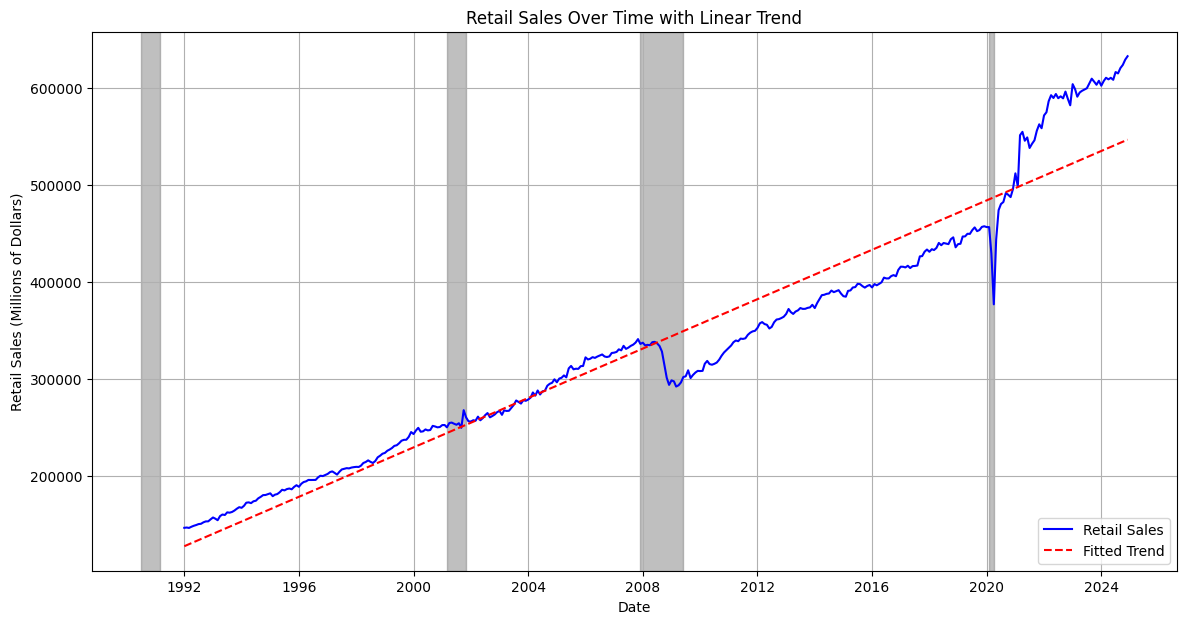

In [9]:
import statsmodels.api as sm
import numpy as np

# Add a time index as an independent variable (trend)
retail_sales_df['Time'] = np.arange(len(retail_sales_df))

# Define the dependent and independent variables
X = sm.add_constant(retail_sales_df['Time'])  # Adds intercept term
y = retail_sales_df['Retail Sales']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Predict fitted values
retail_sales_df['Fitted'] = model.predict(X)

# Plot the original data and the fitted trend line
plt.figure(figsize=(14, 7))
plt.plot(retail_sales_df.index, retail_sales_df['Retail Sales'], label='Retail Sales', color='blue')
plt.plot(retail_sales_df.index, retail_sales_df['Fitted'], label='Fitted Trend', color='red', linestyle='dashed')

# Shade recessionary periods
for start, end in recession_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.5)

plt.title('Retail Sales Over Time with Linear Trend')
plt.xlabel('Date')
plt.ylabel('Retail Sales (Millions of Dollars)')
plt.legend()
plt.grid(True)
plt.show()

The trend appears highly significant as judged by the p-value of the t-statistic on the time trend, and the regression’s R is high. Moreover, the Durbin-Watson statistic indicates that the disturbances are positively serially correlated, so that the disturbance at any time t is positively correlated with the disturbance at time t-1.

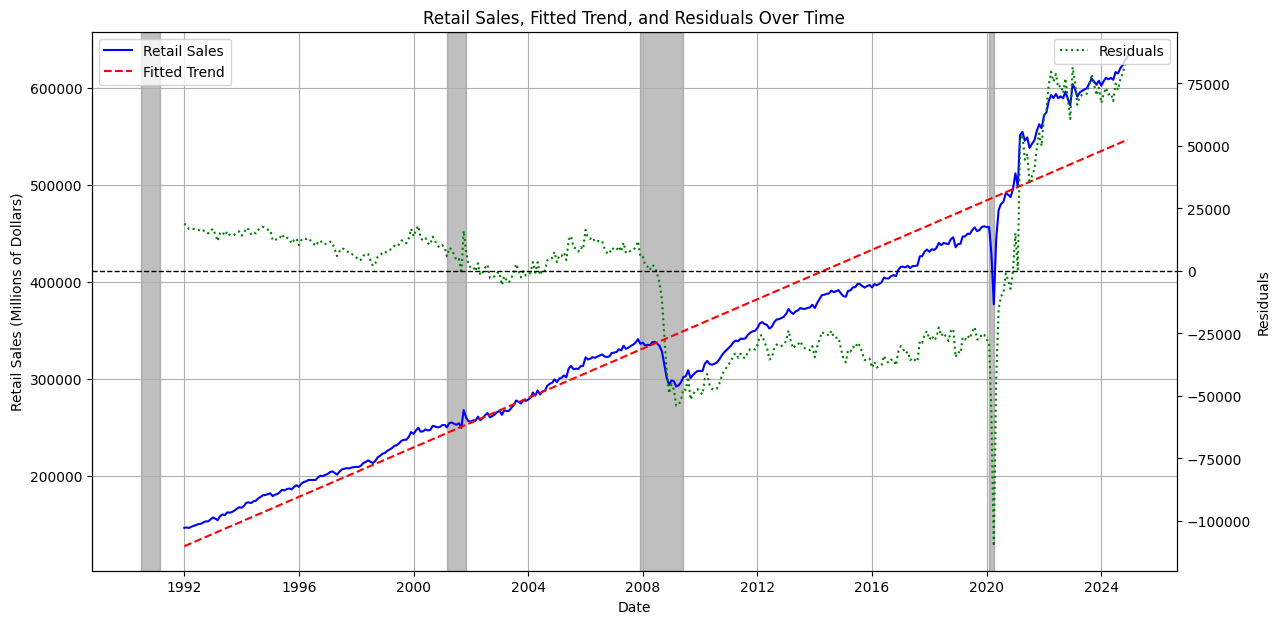

In [10]:
# Calculate residuals
retail_sales_df['Residuals'] = model.resid

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot actual retail sales and fitted trend
ax1.plot(retail_sales_df.index, retail_sales_df['Retail Sales'], label='Retail Sales', color='blue')
ax1.plot(retail_sales_df.index, retail_sales_df['Fitted'], label='Fitted Trend', color='red', linestyle='dashed')
ax1.set_xlabel('Date')
ax1.set_ylabel('Retail Sales (Millions of Dollars)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Shade recessionary periods
for start, end in recession_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.5)

# Create a second y-axis for residuals
ax2 = ax1.twinx()
ax2.plot(retail_sales_df.index, retail_sales_df['Residuals'], label='Residuals', color='green', linestyle='dotted')
ax2.set_ylabel('Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='dashed')  # Add a horizontal line at 0
ax2.legend(loc='upper right')

plt.title('Retail Sales, Fitted Trend, and Residuals Over Time')
plt.show()

                            OLS Regression Results                            
Dep. Variable:           Retail Sales   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     4817.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):          3.69e-277
Time:                        09:37:38   Log-Likelihood:                -4569.1
No. Observations:                 396   AIC:                             9144.
Df Residuals:                     393   BIC:                             9156.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.744e+05   3736.750     46.673      0.0

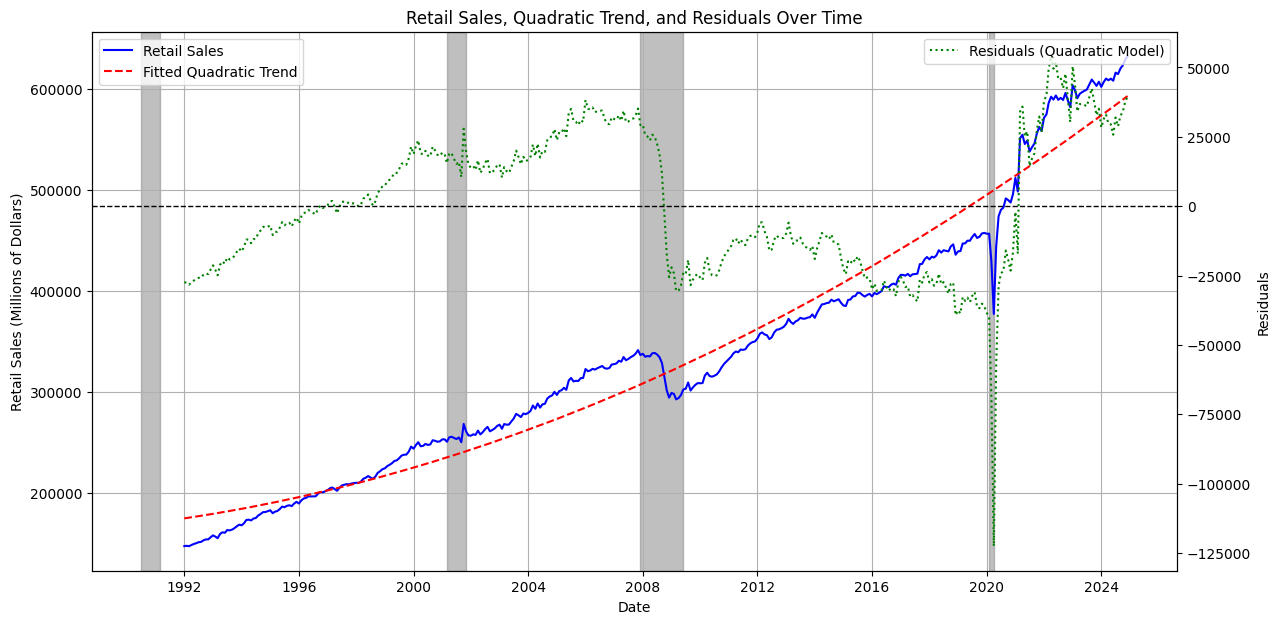

In [11]:
# Add quadratic time trend
retail_sales_df['Time'] = np.arange(len(retail_sales_df))
retail_sales_df['Time^2'] = retail_sales_df['Time'] ** 2  # Quadratic term

# Define independent variables (constant, linear trend, quadratic trend)
X_quad = sm.add_constant(retail_sales_df[['Time', 'Time^2']])  
y = retail_sales_df['Retail Sales']

# Fit the quadratic regression model
model_quad = sm.OLS(y, X_quad).fit()

# Print model summary
print(model_quad.summary())

# Predict fitted values
retail_sales_df['Fitted_Quad'] = model_quad.predict(X_quad)

# Calculate residuals
retail_sales_df['Residuals_Quad'] = model_quad.resid

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot actual retail sales and quadratic fitted trend
ax1.plot(retail_sales_df.index, retail_sales_df['Retail Sales'], label='Retail Sales', color='blue')
ax1.plot(retail_sales_df.index, retail_sales_df['Fitted_Quad'], label='Fitted Quadratic Trend', color='red', linestyle='dashed')
ax1.set_xlabel('Date')
ax1.set_ylabel('Retail Sales (Millions of Dollars)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Shade recessionary periods
for start, end in recession_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.5)

# Create a second y-axis for residuals
ax2 = ax1.twinx()
ax2.plot(retail_sales_df.index, retail_sales_df['Residuals_Quad'], label='Residuals (Quadratic Model)', color='green', linestyle='dotted')
ax2.set_ylabel('Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='dashed')  # Add a horizontal line at 0
ax2.legend(loc='upper right')

plt.title('Retail Sales, Quadratic Trend, and Residuals Over Time')
plt.show()

In [12]:
# AIC and BIC for the Linear Trend Model
aic_linear = model.aic
bic_linear = model.bic

# AIC and BIC for the Quadratic Trend Model
aic_quad = model_quad.aic
bic_quad = model_quad.bic

# Print results
print(f"Linear Model: AIC = {aic_linear:.2f}, BIC = {bic_linear:.2f}")
print(f"Quadratic Model: AIC = {aic_quad:.2f}, BIC = {bic_quad:.2f}")

# Compare Models
if aic_quad < aic_linear and bic_quad < bic_linear:
    print("The quadratic model has a better fit (lower AIC/BIC).")
elif aic_quad > aic_linear and bic_quad > bic_linear:
    print("The linear model has a better fit (lower AIC/BIC).")
else:
    print("Mixed results: One model may be better depending on the criterion used.")

Linear Model: AIC = 9354.86, BIC = 9362.82
Quadratic Model: AIC = 9144.29, BIC = 9156.23
The quadratic model has a better fit (lower AIC/BIC).


In [13]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic for both models
dw_linear = durbin_watson(retail_sales_df['Residuals'])
dw_quad = durbin_watson(retail_sales_df['Residuals_Quad'])

# Print results
print(f"Durbin-Watson Statistic (Linear Model): {dw_linear:.4f}")
print(f"Durbin-Watson Statistic (Quadratic Model): {dw_quad:.4f}")

# Interpretation Guide:
# - DW ≈ 2: No autocorrelation
# - DW < 2: Positive autocorrelation (common in time series)
# - DW > 2: Negative autocorrelation

Durbin-Watson Statistic (Linear Model): 0.0402
Durbin-Watson Statistic (Quadratic Model): 0.0684


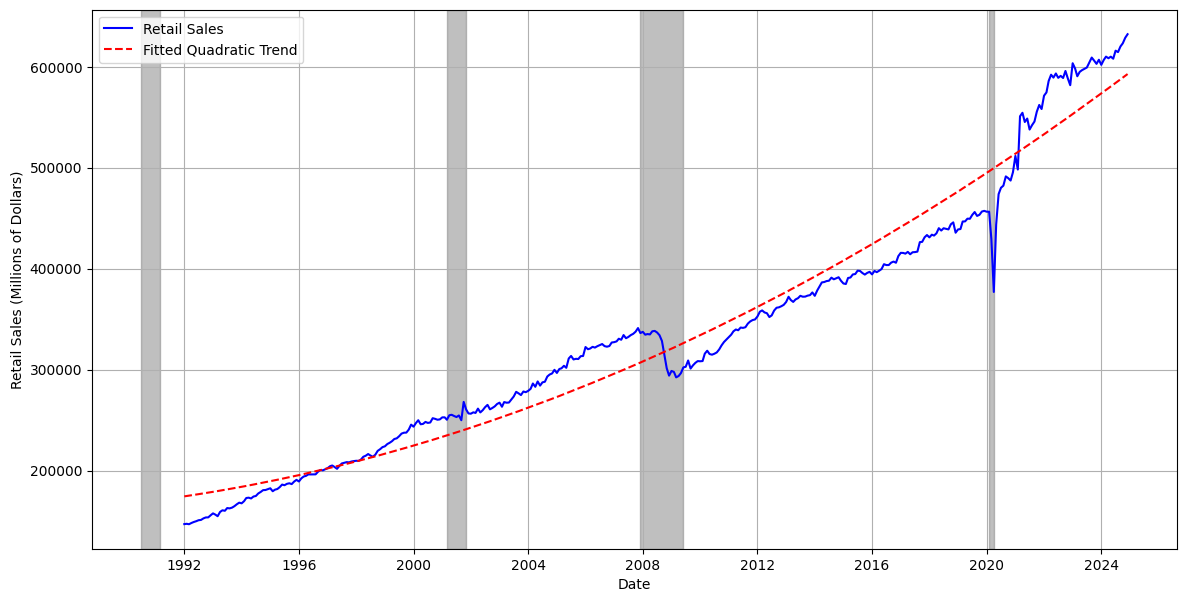

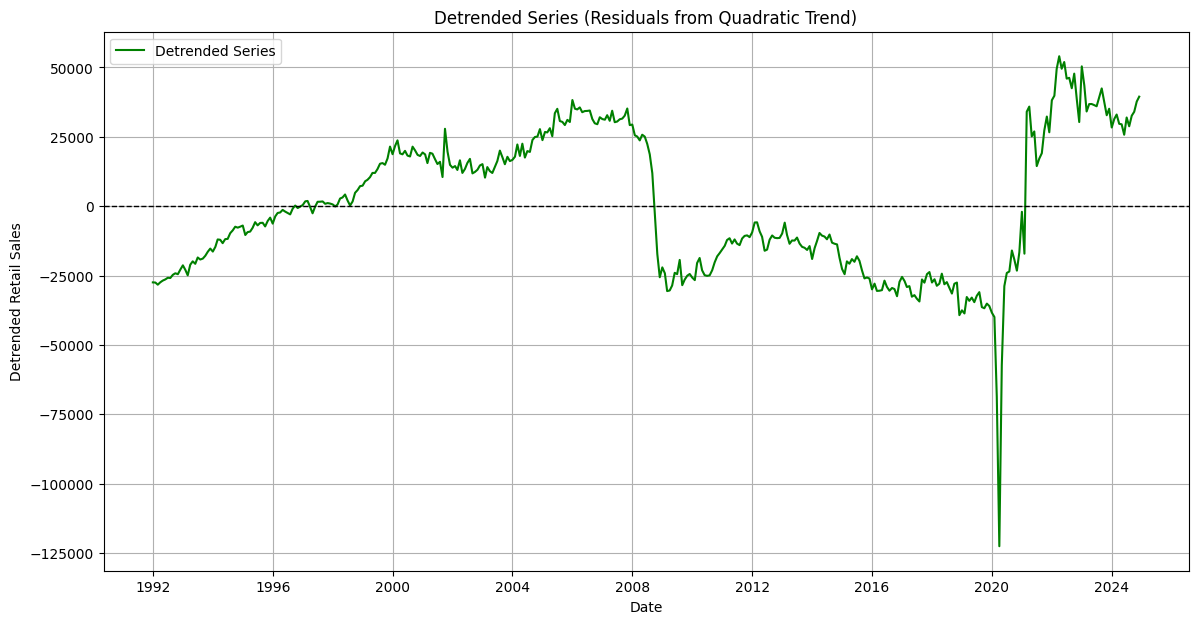

In [14]:
# Compute the detrended series
retail_sales_df['Detrended'] = retail_sales_df['Retail Sales'] - retail_sales_df['Fitted_Quad']

# Plot original retail sales, quadratic trend, and detrended series
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the original retail sales and quadratic trend
ax1.plot(retail_sales_df.index, retail_sales_df['Retail Sales'], label='Retail Sales', color='blue')
ax1.plot(retail_sales_df.index, retail_sales_df['Fitted_Quad'], label='Fitted Quadratic Trend', color='red', linestyle='dashed')
ax1.set_xlabel('Date')
ax1.set_ylabel('Retail Sales (Millions of Dollars)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Shade recessionary periods
for start, end in recession_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.5)

# Plot the detrended series
fig, ax2 = plt.subplots(figsize=(14, 7))
ax2.plot(retail_sales_df.index, retail_sales_df['Detrended'], label='Detrended Series', color='green')
ax2.axhline(0, color='black', linewidth=1, linestyle='dashed')  # Reference line at zero
ax2.set_title('Detrended Series (Residuals from Quadratic Trend)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Detrended Retail Sales')
ax2.legend()
ax2.grid(True)

plt.show()

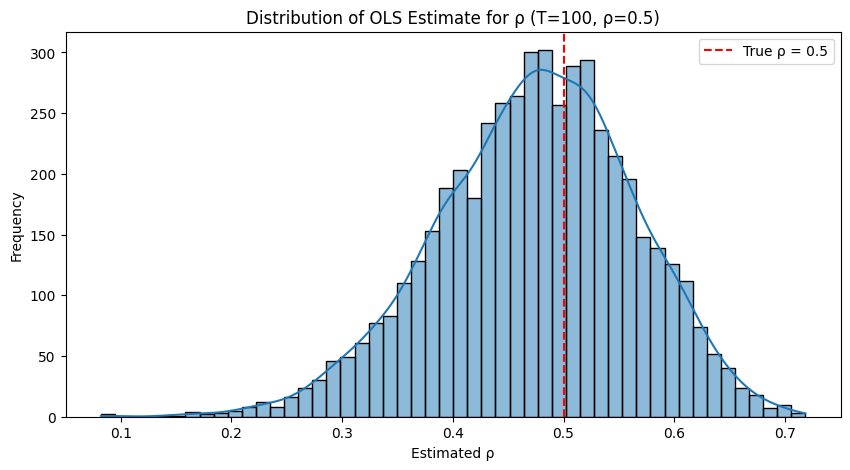

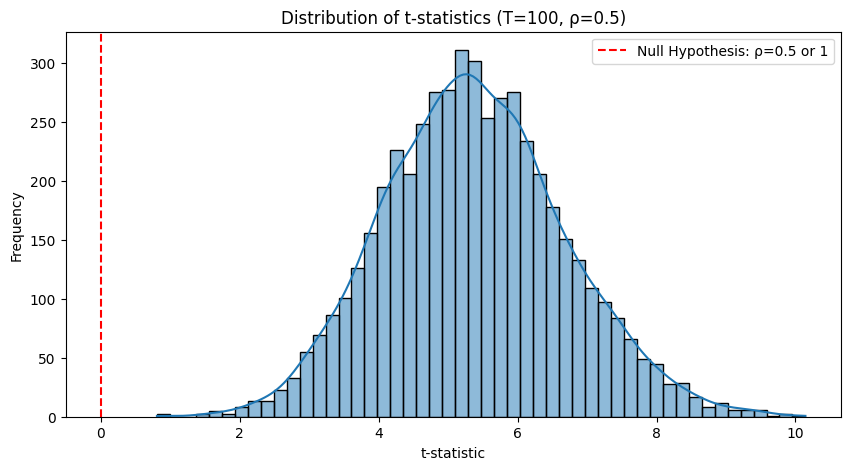

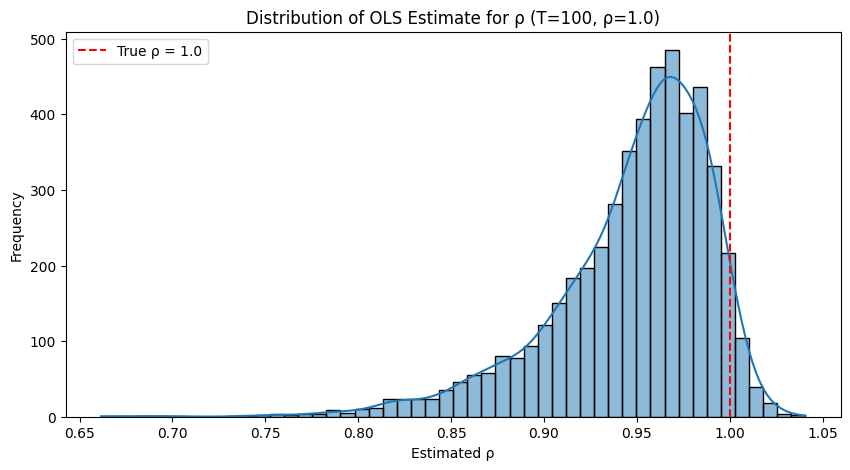

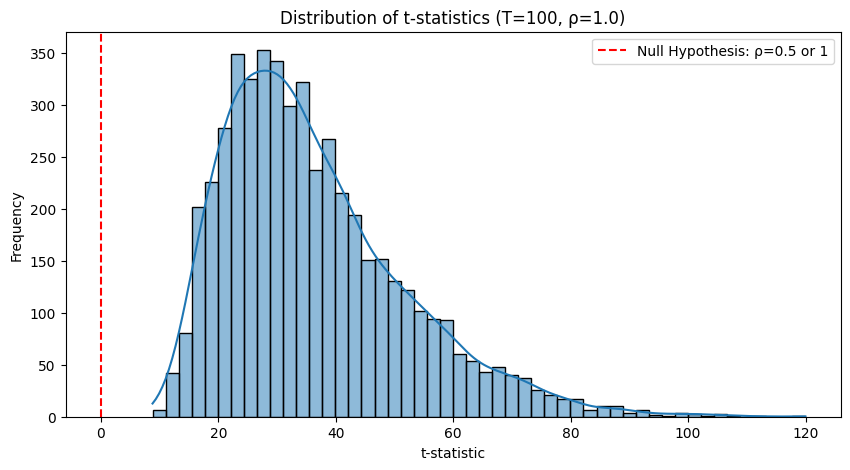

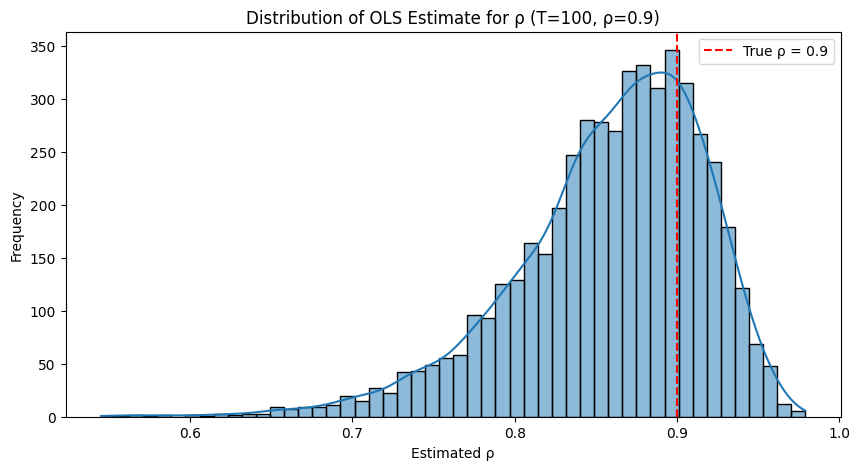

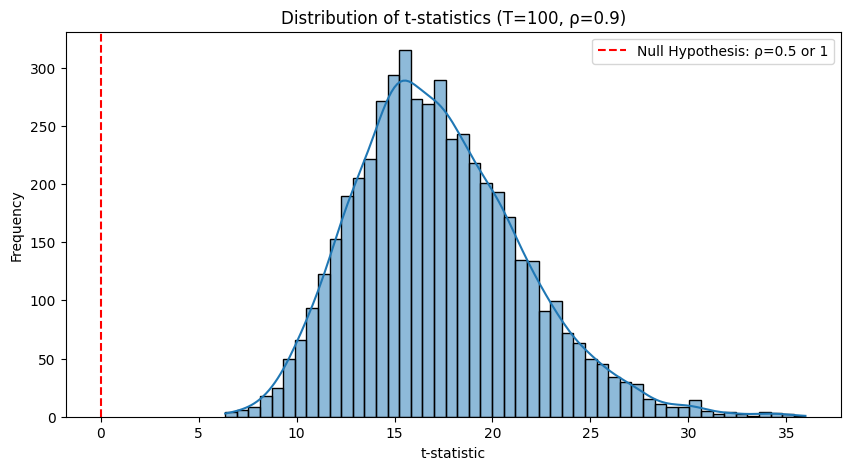

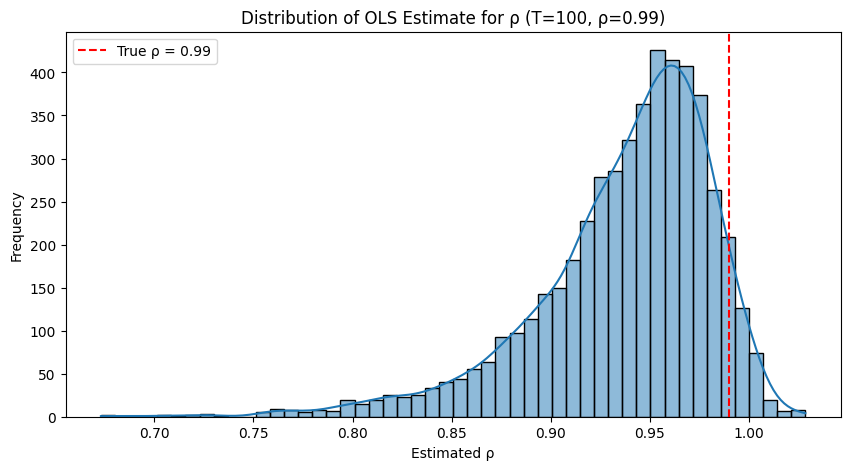

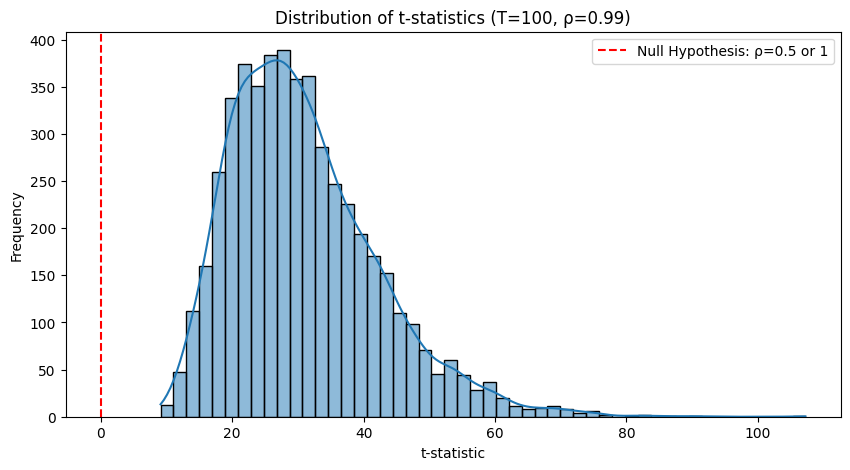

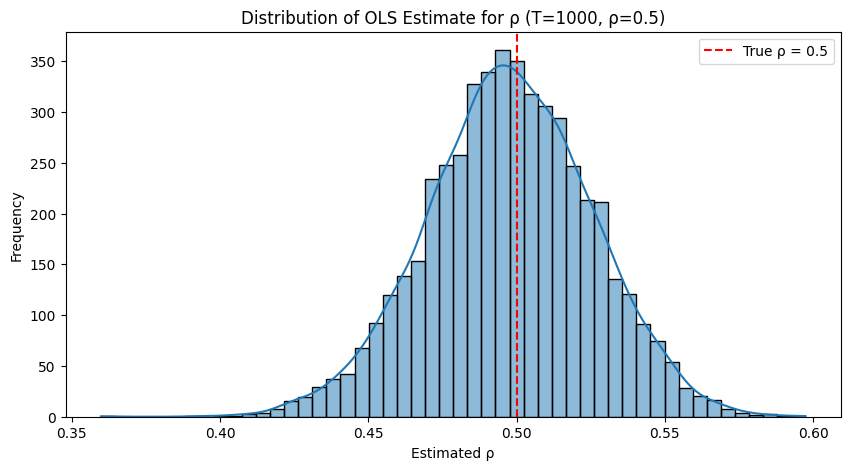

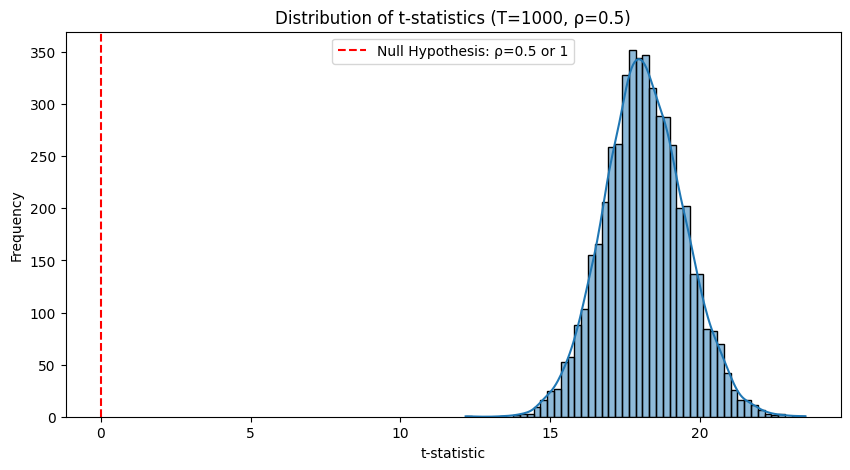

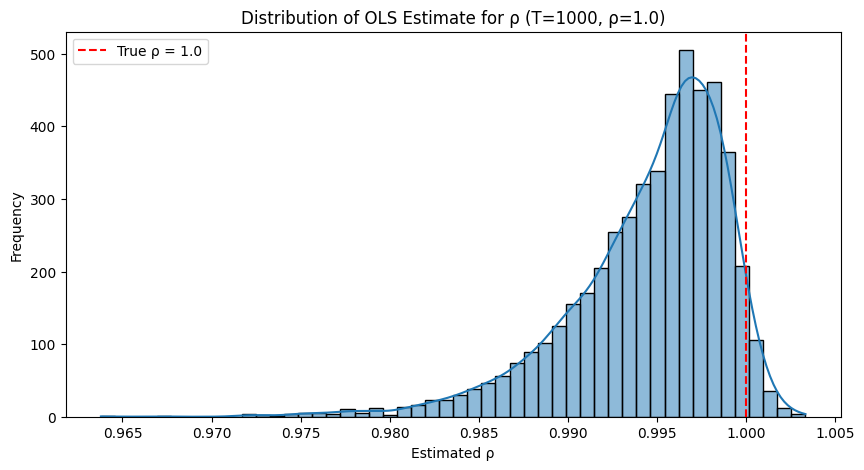

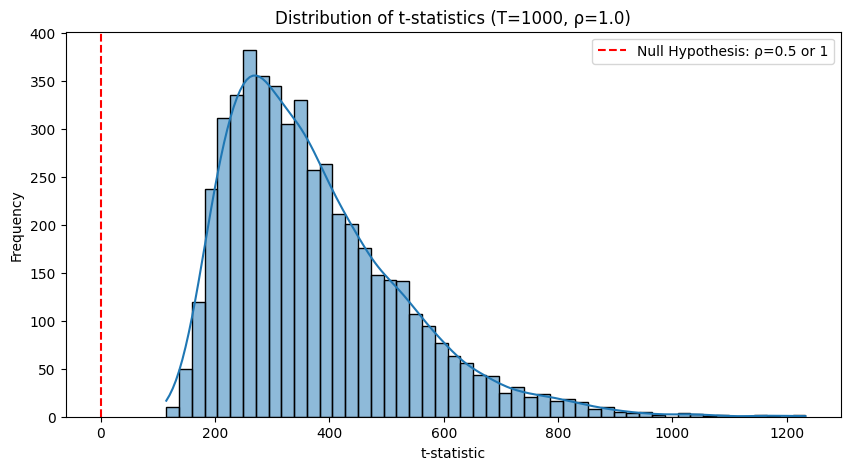

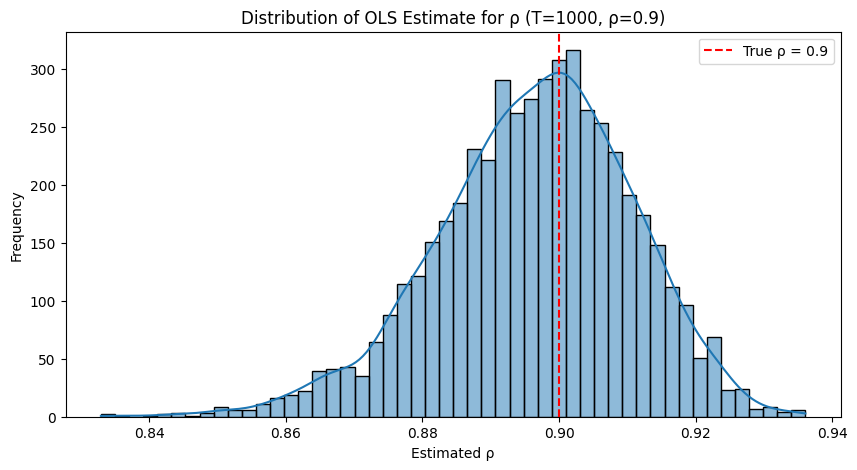

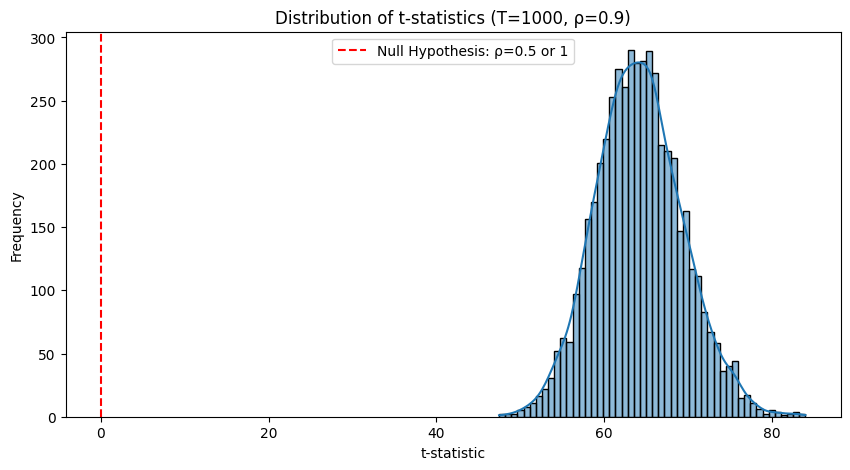

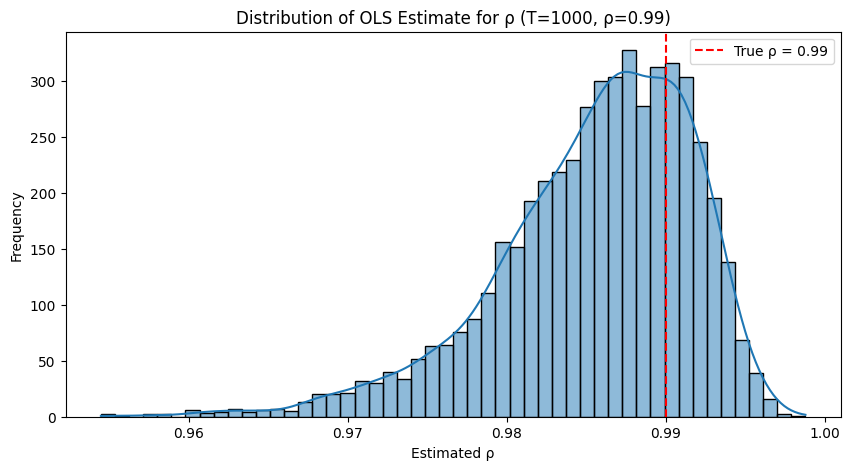

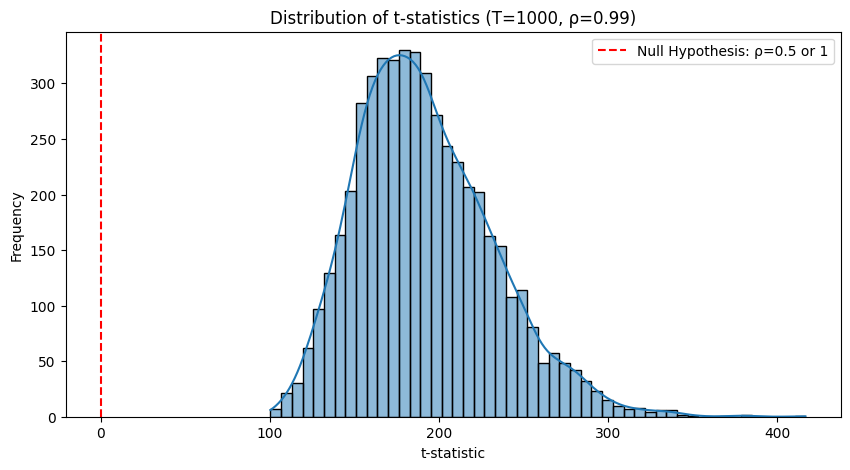

T=100, ρ=0.5 → Mean ρ_hat: 0.4742, Std: 0.0892
T=100, ρ=0.5 → Mean t-stat: 5.3752, Std: 1.3011

T=100, ρ=1.0 → Mean ρ_hat: 0.9476, Std: 0.0434
T=100, ρ=1.0 → Mean t-stat: 36.3424, Std: 15.5235

T=100, ρ=0.9 → Mean ρ_hat: 0.8585, Std: 0.0588
T=100, ρ=0.9 → Mean t-stat: 17.2561, Std: 4.2797

T=100, ρ=0.99 → Mean ρ_hat: 0.9373, Std: 0.0450
T=100, ρ=0.99 → Mean t-stat: 30.8638, Std: 11.2397

T=1000, ρ=0.5 → Mean ρ_hat: 0.4976, Std: 0.0278
T=1000, ρ=0.5 → Mean t-stat: 18.1380, Std: 1.3464

T=1000, ρ=1.0 → Mean ρ_hat: 0.9945, Std: 0.0045
T=1000, ρ=1.0 → Mean t-stat: 373.5776, Std: 153.1120

T=1000, ρ=0.9 → Mean ρ_hat: 0.8964, Std: 0.0143
T=1000, ρ=0.9 → Mean t-stat: 64.1903, Std: 5.1735

T=1000, ρ=0.99 → Mean ρ_hat: 0.9855, Std: 0.0062
T=1000, ρ=0.99 → Mean t-stat: 191.8831, Std: 40.4243



In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
T_values = [100, 1000]
rho_values = [0.5, 1.0, 0.9, 0.99]
num_simulations = 5000

# Function to generate AR(1) process
def generate_ar1(T, rho):
    np.random.seed()
    y = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)
    for t in range(1, T):
        y[t] = rho * y[t - 1] + epsilon[t]
    return y

# Function to estimate rho using OLS
def estimate_rho(y):
    X = y[:-1]
    Y = y[1:]
    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(Y, X).fit()
    return model.params[1], model.bse[1], model.tvalues[1]  # rho_hat, standard error, t-statistic

# Monte Carlo Simulation
results = {}
for T in T_values:
    for rho in rho_values:
        rho_hats = []
        t_stats = []
        
        for _ in range(num_simulations):
            y = generate_ar1(T, rho)
            rho_hat, se, t_stat = estimate_rho(y)
            rho_hats.append(rho_hat)
            t_stats.append(t_stat)

        # Store results
        results[(T, rho)] = {"rho_hats": rho_hats, "t_stats": t_stats}

        # Plot distributions
        plt.figure(figsize=(10, 5))
        sns.histplot(rho_hats, bins=50, kde=True)
        plt.axvline(rho, color='red', linestyle='--', label=f'True ρ = {rho}')
        plt.title(f"Distribution of OLS Estimate for ρ (T={T}, ρ={rho})")
        plt.xlabel("Estimated ρ")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 5))
        sns.histplot(t_stats, bins=50, kde=True)
        plt.axvline(0, color='red', linestyle='--', label="Null Hypothesis: ρ=0.5 or 1")
        plt.title(f"Distribution of t-statistics (T={T}, ρ={rho})")
        plt.xlabel("t-statistic")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

# Summary of results
for key, value in results.items():
    T, rho = key
    mean_rho_hat = np.mean(value["rho_hats"])
    std_rho_hat = np.std(value["rho_hats"])
    mean_t_stat = np.mean(value["t_stats"])
    std_t_stat = np.std(value["t_stats"])
    
    print(f"T={T}, ρ={rho} → Mean ρ_hat: {mean_rho_hat:.4f}, Std: {std_rho_hat:.4f}")
    print(f"T={T}, ρ={rho} → Mean t-stat: {mean_t_stat:.4f}, Std: {std_t_stat:.4f}\n")